# Part II – Feedforward NNs, Autoencoders and Convolutional NNs

Based on the code in the exercise sheet.

Neural Network Speccs:
- 784->128->64->10
- input->hidden->hidden->10
- . -(Relu)-> . -ELU-> . -softmax-> .

Training: 
- For 5 epochs.


**Data import:**

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) =mnist.load_data()
# Normalixe the images to the range [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Neural Network:**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

In [4]:

# ENCODER #
# Define input layer
inputs = Input(shape=(28, 28, 1))
# Define the decoder layers
x = inputs
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(784, activation='relu')(x)
x = Reshape((28, 28, 1))(x)
outputs = x
## Model
autoencoder = Model(inputs=inputs, outputs=outputs)
model = autoencoder
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0     

Training


In [5]:
# Train the model
history = model.fit(train_images, train_images, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


750/750 [==============================] - 8s 8ms/step - loss: 0.0420 - accuracy: 0.8055 - val_loss: 0.0351 - val_accuracy: 0.8083
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0337 - accuracy: 0.8078 - val_loss: 0.0323 - val_accuracy: 0.8086
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0311 - accuracy: 0.8083 - val_loss: 0.0296 - val_accuracy: 0.8094
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0289 - accuracy: 0.8089 - val_loss: 0.0282 - val_accuracy: 0.8096
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0279 - accuracy: 0.8092 - val_loss: 0.0277 - val_accuracy: 0.8099


# Let's apply the Autoencoder:

We show examples of input images and it's output reconstructed images.

Details: The NN is `model.predict(test_images)`. Giving us the output `(NN(test_example1), NN(test_example2), ...)` or whatever. 

In [6]:
# Predict the test dataset
reconstructed_images = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


1. I define an visualizer function that compares two image sets, `display_images(orig, recon)`.
2. I apply it to (`test_images`, `reconstructed_images`).

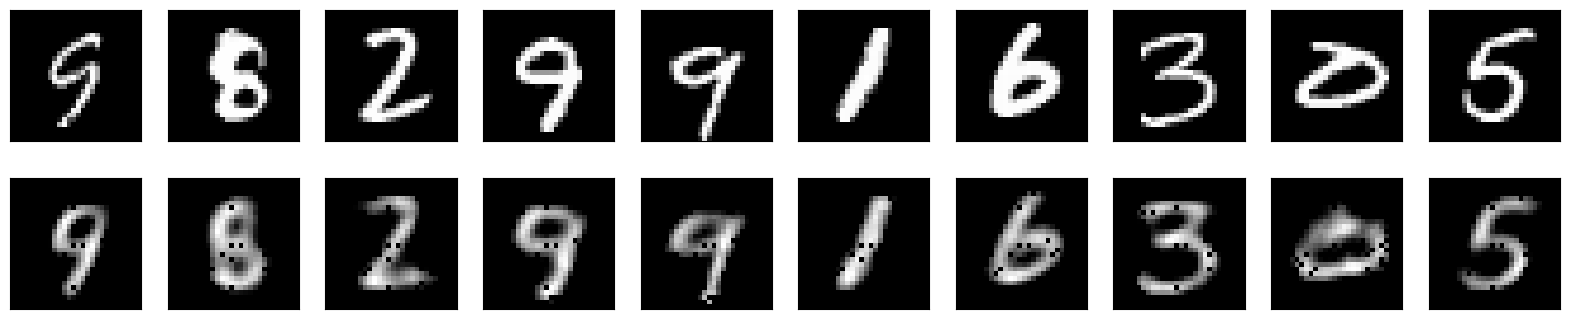

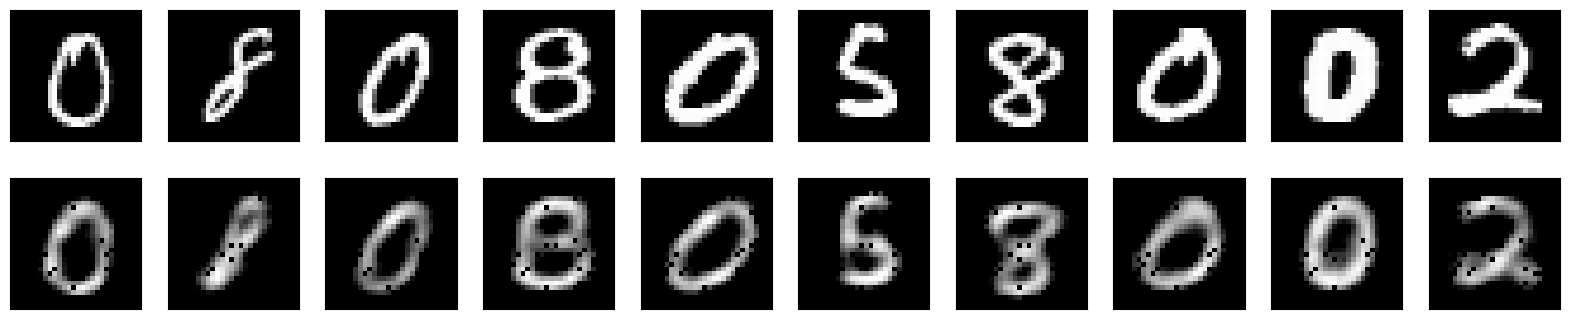

In [7]:
# Function to visualize the original_picture's and the predicted_picture's.
def display_images(orig, recon):
    # Randomly select 20 unique indices to display
    indices = np.random.choice(len(orig), 20, replace=False) #Random indices
    # indices = np.arange(20) #Non-Random indices

    for j in range(2):  # Two loops for two separate figures
        plt.figure(figsize=(20, 4))
        for i in range(10):  # Each figure displays 10 pairs of images
            index = indices[j * 10 + i]

            # Display original
            ax = plt.subplot(2, 10, i + 1)
            plt.imshow(orig[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # Display reconstruction
            ax = plt.subplot(2, 10, i + 11)
            plt.imshow(recon[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

# Show the original and reconstructed images
display_images(test_images, reconstructed_images)


# OBSOLETE START#
# Note: You can test this by putting it inside the `display_images`` function if you want.
# Observation: I'm getting extra dead/black Pixels.
# Hypothesis: It's because the low/white values underflow, to being high/black again.
# Observation: Using np.max/min I observe the original_data range is [0,1], but the reconstructed_data range is [0, 0.0,1.823].
# Observation: Experiments show that imshow is weird. 
    # Obs1: High values are white, low are black.
    # Obs2: It looks at the range of values [a,b], and sets a to black and b to white, and in between to shades of gray.
# Conclusion: I thin kthe pixels are just dead, it's not an overflow problem.
#print(f"value range in 'orig' is: [{np.min(orig)},{np.max(orig)}]")
#print(f"value range in 'recon' is: [{np.min(recon)},{np.max(recon)}]")
# Obsolete: My solution for this was to clip the values to the range [0, 1], but it's pointless.
#orig = np.clip(orig, 0.9999, 1.0)
#recon = np.clip(recon, 0, 1)
#print(f"value range in 'orig' after is: [{np.min(orig)},{np.max(orig)}]")
#print(f"value range in 'recon' after is: [{np.min(recon)},{np.max(recon)}]")
# OBSOLETE END#

# Plot accuracy and loss, with epochs:

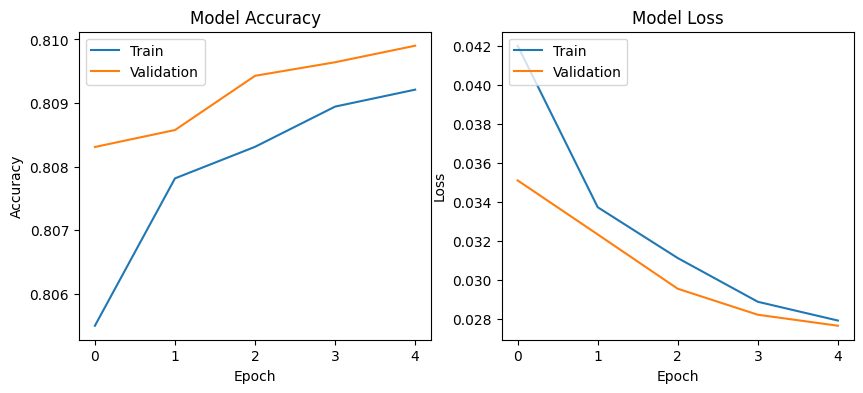

In [8]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)